In [1]:
import os
import sys
print(sys.path)
import subprocess
import shutil
import pandas as pd
import numpy as np
import calendar
import traceback
import json
from pyutils import *
from pdutils import *
from pdpltutils import *
from gputils import *
from iputils import *
import xmltodict
import re

['C:\\Users\\jimbl\\Git\\CMUProjects\\Jupyter', 'C:\\Users\\jimbl\\Git\\PyUtils\\lib', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\python38.zip', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\DLLs', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib', 'C:\\Users\\jimbl\\.conda\\envs\\py38', '', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\GDAL-3.0.2-py3.8-win-amd64.egg', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\win32', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\win32\\lib', 'C:\\Users\\jimbl\\.conda\\envs\\py38\\lib\\site-packages\\Pythonwin']


## Initialization

In [2]:
if sys.platform == "linux":
    IP2DIR="/home/jblake1/Downloads/Network_Measurements"
    DATADIR="/home/jblake1/Downloads/Network_Measurements"
    DATADIR2="/home/jblake1/LEL_Network_Project"
else:
    IP2DIR="C:\\Users\\jimbl\\Downloads\\"
    DATADIR="C:\\Users\\jimbl\\Downloads\\"
    # DATADIR2="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\ping-iperf-traceroute-2024-03-22-24"
    # DATADIR2="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\LEL_Measures_03-22-2024_to_04_02_2024"
    DATADIR2="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study\\All_Measures"
print(f"{IP2DIR} exists") if os.path.isdir(IP2DIR) else print(f"{IP2DIR} does not exist")
print(f"{DATADIR} exists") if os.path.isdir(DATADIR) else print(f"{DATADIR} does not exist")
print(f"{DATADIR2} exists") if os.path.isdir(DATADIR2) else print(f"{DATADIR2} does not exist")
IP2LITE="IP2LOCATION-LITE-DB11.CSV"


''' US Boundaries '''
northern=49.382808 # latitude
southern=24.521208
eastern=-66.945392 # longitude
western=-124.736342
pointdict = {
 'northeast':[northern,eastern],
 'northwest':[northern,western],
 'southeast':[southern,eastern],
 'southwest':[southern,western]
}
tdfb = pd.DataFrame.from_dict(pointdict,orient='index',columns=['latitude','longitude'])
tdfb['geometry'] = pt2geom(tdfb,latcol='latitude',lngcol='longitude')
usagb = df2gp(tdfb.copy())
# To plot this map first:
# ax= gp_plotPoints(usagb,mapon=True, alpha=0)

C:\Users\jimbl\Downloads\ exists
C:\Users\jimbl\Downloads\ exists
C:\Users\jimbl\Box\BoxDesktop\Documents\LEL\Network_Measurements\Network_Study\All_Measures exists


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\pandas\core\dtypes\cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\jimbl\.conda\envs\py38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [12]:
def histplot(dfin,title='Unknown Title',ax=None,filename='tmp.png', 
    figsize=(10,10), xlabel='',ylabel='',tabon=True, saveon=False,
    bins=10, alpha=0.5, fontsize = 30, yticks = True,
    tabfontsize = 30, tabsizex = 1,tabsizey=2,**kwargs):
    font = {'size':fontsize}
    matplotlib.rc('font',**font)
    df = pd.DataFrame(dfin) # in case actually a series
    ''' Parameters '''
    if ax is None:
        ax = plt.figure(figsize=figsize).add_subplot(111)
    ''' Plot '''
    ax = df.plot.hist(bins=bins,alpha=alpha,title=title,figsize=figsize,ax=ax,**kwargs)
    ax.set_xlabel(xlabel)
    if not yticks: ax.set_yticklabels([])
    # print(tabon)
    if tabon:
        tabcolWidths = [0.2]
        tab = table(ax,np.round(df.describe(),2),loc='upper right',colWidths=tabcolWidths)
        tab.set_fontsize(tabfontsize)
        tab.scale(tabsizex,tabsizey)
    if saveon:
        print("Saving %s" % filename)
        savePlot(ax,filename)
    return ax
def makeHist(fdf,title="UNKNOWN", filename="tmp.png"):
    collst = fdf.columns.sort_values()
    col0 = collst[0]
    coln = collst[len(collst)-1]
    # print(col0)
    ax = histplot(fdf[col0],tabon=False, legend=False)
    for col in collst[1:-1]:
        ax = histplot(fdf[col],ax=ax,tabon=False, legend=False, label="PING",by=None)
    ax = histplot(fdf[coln],ax=ax,tabon=False, title=title,saveon=False)
    ax.legend(fontsize="20",loc="right")
    savePlot(ax,filename)
# tabcolWidths = [0.1]
# tab = table(ax,np.round(tdfy.describe(),2),loc='bottom')
# # tab.set_fontsize(30)
# # tab.scale(10,10)

In [ ]:
tdf=readjoin(IP2DIR,IP2LITE)
collst=['ip_from', 'ip_to', 'country_code', 'country_name', 'region_name', 'city_name', 'latitude', 'longitude', 'zip_code', 'time_zone']
tdf.columns = collst
dumpdf(tdf)

In [ ]:
print(ipno2ipadd(34622462))
tdf['ip_from_str'] = tdf['ip_from'].map(ipno2ipadd)
tdf['ip_to_str'] = tdf['ip_to'].map(ipno2ipadd)

In [ ]:
tstipadd = '2.16.75.254'
print(ipadd2ipno(tstipadd))
ipno2ipadd(ipadd2ipno(tstipadd))

In [ ]:
dumpdf(tdf[tdf.country_code=='US'])

In [ ]:
for col in ['country_name','region_name','city_name']:
    tdf[col] = tdf[col].str.replace(", ","--")
dumpdf(tdf[tdf['city_name'].str.contains('Madrid')].drop_duplicates())

In [ ]:
writejoin(tdf.set_index('ip_from'),IP2DIR,IP2LITE.replace(".CSV","CLEAN.CSV"))

Start here if reading current database

In [3]:
tdfx = readjoin(IP2DIR,IP2LITE.replace(".CSV","CLEAN.CSV"))
dumpdf(tdfx)
idf = tdfx.copy()


(2983069, 12)
    ip_from     ip_to country_code              country_name region_name  \
0  16777216  16777471           US  United States of America  California   
1  16777472  16778239           CN                     China      Fujian   
2  16778240  16779263           AU                 Australia    Victoria   
3  16779264  16781311           CN                     China   Guangdong   
4  16781312  16785407           JP                     Japan       Tokyo   

   city_name   latitude   longitude  zip_code time_zone ip_from_str  \
0   San Jose  37.339390 -121.894960     95101    -07:00     1.0.0.0   
1     Fuzhou  26.061390  119.306110    350004    +08:00     1.0.1.0   
2  Melbourne -37.814007  144.963171      3000    +11:00     1.0.4.0   
3  Guangzhou  23.127361  113.264570    510140    +08:00     1.0.8.0   
4      Tokyo  35.689497  139.692317  160-0021    +09:00    1.0.16.0   

    ip_to_str  
0   1.0.0.255  
1   1.0.3.255  
2   1.0.7.255  
3  1.0.15.255  
4  1.0.31.255  
ip_fro

## Traceroute Plotting

In [ ]:
testip = "208.185.145.133"
ntestip = ipadd2ipno(testip)
tdfx[(tdfx.ip_from <= ntestip ) & (tdfx.ip_to >= ntestip) ]

In [ ]:
testiplst = ["128.2.0.9","198.71.47.208","163.253.1.240","163.253.2.125",
             "162.252.69.197","142.251.78.61","142.251.65.101","8.8.8.8"]
testiplst = ["192.168.0.1",
"10.5.102.254",
"10.177.15.83",
"10.177.62.228",
"208.185.145.133",
"154.54.83.54",
"154.24.79.74",
"154.24.79.78",
"38.140.44.154",
"128.2.5.206",
"128.2.255.8",
"128.2.255.162"]

testiplst = ["128.2.209.111", "192.168.0.1", "10.6.102.254", "10.5.102.254", "10.177.15.83", "10.177.62.237", 
             "10.177.62.238", "10.177.62.228", "10.164.178.163", "208.185.145.133", "154.54.30.53", "154.54.82.222",
             "154.24.79.74", "38.140.44.154", "128.2.0.177", "128.2.0.162", "128.2.208.222"]


In [ ]:
def runIPlst(idf,lst):
    fdf = pd.DataFrame()
    for ip in testiplst:
        nip = ipadd2ipno(ip)
        tdf = idf[(idf.ip_from <= nip ) & (idf.ip_to >= nip)  & (idf.latitude != 0 ) ]
        tdf['IP'] = ip
        fdf = pd.concat([fdf,tdf])
    fdf['geometry'] = pt2geom(fdf,latcol='latitude',lngcol='longitude')
    fdf['geometrynext'] = fdf['geometry'].shift(-1)
    fdf['region_name_next'] = fdf['region_name'].shift(-1)
    fdf['city_name_next'] = fdf['city_name'].shift(-1)
    fdf = fdf.dropna()
    tgp = df2gp(fdf.copy())
    tgp['LINEGEO'] = tgp.apply(lambda row: LineString([row['geometry'],row['geometrynext']]), axis = 1)
#     dumpdf(tgp)
    return tgp
# display_rows = ['region_name','city_name','latitude','longitude']
tgpa = runIPlst(tdfx,testiplst).reset_index(drop=True)
display_all(tgpa)

In [ ]:
# ax= gp_plotPoints(usagb,mapon=True, alpha=0)
# ax= gp_plotPoints(tgpa,ax=ax,mapon=True,c='red')
ax = gp_plotPoints(tgpa,mapon=True,c='red')
gp_plotLines(tgpa,mapon=True,geocol='LINEGEO',ax=ax,color='green')

In [ ]:
savePlot(ax,"./tmp2.png")

In [ ]:
ax= gp_plotPoints(usagb,mapon=True, alpha=0)

In [ ]:
provlst = gp_printCTXproviders()
print(provlst)

## Traceroute parsing

In [ ]:
TRFN="TMB-trt-52.70.44.155-Thu_Mar_14_02_34_55_PM_EDT_2024.txt"
TRFN="LEL-trt-52.70.44.155-Thu_Mar_14_02_37_00_PM_EDT_2024.txt"
DFFN1=os.path.join(IP2DIR,TRFN)
with open(DFFN1, 'r') as f: fn1lines = f.readlines()

In [ ]:
print(fn1lines[1])
# rec = re.compile("\(.*\)")
rec = re.compile("\(\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}\)")
rec.findall(fn1lines[1])

# res = float(rec.findall(fn1lines[1])[0][5:].strip())

In [ ]:
tdfx = pd.DataFrame(fn1lines,columns=['lines'])
tdfx['IPS'] = tdfx.lines.map(lambda line: rec.findall(line))

In [ ]:
dumpdf(tdfx)

In [ ]:
iplst = [
    x.replace("(","").replace(")","")
    for xs in list(tdfx.IPS)
    for x in xs
]
iplst
testiplst=iplst.copy()

In [ ]:
testiplst

## Ping parsing and Plotting

In [ ]:
if sys.platform == 'linux':
    DATADIR="/home/jblake1/Downloads/Network_Measurements"
else:
    DATADIR="C:\\Users\\jimbl\\Downloads\\"
DATAFILE1="TMB-ping-52.70.44.155-Thu_Mar_14_02_35_21_PM_EDT_2024.txt"
DATAFILE2="LEL-ping-52.70.44.155-Thu_Mar_14_02_37_26_PM_EDT_2024.txt"
DFFN1=os.path.join(DATADIR,DATAFILE1)
DFFN2=os.path.join(DATADIR,DATAFILE2)

In [ ]:
with open(DFFN1, 'r') as f: fn1lines = f.readlines()
with open(DFFN2, 'r') as f: fn2lines = f.readlines()

fn1lines = [ line for line in fn1lines if line.startswith("64") ]
fn2lines = [ line for line in fn2lines if line.startswith("64") ]

In [ ]:
rec = re.compile("time=.* ")
res = float(rec.findall(fn1lines[1])[0][5:].strip())
for ii,line in enumerate(fn1lines[1:-1]):
    print(f"{ii}  {float(rec.findall(line)[0][5:].strip())}")

tmobdf = pd.DataFrame(fn1lines[1:],columns=['lines'])
# display_all(tmobdf)
tmobdf['pingtime'] = tmobdf.lines.map(lambda xx: float(rec.findall(xx)[0][5:].strip()) )
leldf = pd.DataFrame(fn2lines[1:],columns=['lines'])
leldf['pingtime'] = leldf.lines.map(lambda xx: float(rec.findall(xx)[0][5:].strip()) )

In [ ]:
ax = histplot(tmobdf.pingtime,tabon=False, legend=False)
ax = histplot(leldf.pingtime,ax=ax,tabon=False, legend=False, title="T-Mobile vs. LEL Ping Times",saveon=True, filename="tmp3.png")

# Network Study

In [ ]:
if sys.platform == 'linux':
    DATADIR="/home/jblake1/Downloads/Network_Measurements/Network_Study"
else:
    DATADIR="C:\\Users\\jimbl\\Box\\BoxDesktop\\Documents\\LEL\\Network_Measurements\\Network_Study"
print(f"{DATADIR} exists") if os.path.isdir(DATADIR) else print(f"{DATADIR} does not exist")

In [ ]:
txtfiles = [fn for fn in os.listdir(DATADIR) if fn.endswith(".txt")]
iperffiles = [os.path.join(DATADIR,fn) for fn in txtfiles if fn.startswith("iperf3-")]
pingfiles =  [os.path.join(DATADIR,fn) for fn in txtfiles if fn.startswith("ping-")]
trrtfiles =  [os.path.join(DATADIR,fn) for fn in txtfiles if fn.startswith("tracert-")]

## Network Study -- Ping

In [ ]:
def readPingFile(fn):
    strstr="ping-output-"
    endstr="-2024-03-19.txt"
    coltag = re.findall(f"{strstr}.*{endstr}",fn)[0].replace(strstr,"").replace(endstr,"")
    coltag = "CMU-" + coltag if not coltag.startswith("AWS-") else coltag
    with open(fn, 'r') as f: fnlines = f.readlines()
    fnlines = [fn.replace("<","=") for fn in fnlines[1:]]
    rec = re.compile(" \d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3} ")
    destip = rec.findall(fnlines[0])[0].strip()
    rec = re.compile("time=.* ")
    timelines=[line for line in fnlines if rec.search(line)]
    times = [float(rec.findall(line)[0].strip()[5:-2]) for line in timelines]
    fdf = pd.DataFrame(times,columns=[f"{coltag}"])   
    return fdf

print(pingfiles)
readPingFile(pingfiles[7])


In [ ]:
tdfx = pd.DataFrame()
for fn in pingfiles:
    tdfx = pd.concat([tdfx,readPingFile(fn)],axis=1)
display_all(tdfx)

In [ ]:
awscols = [col for col in tdfx.columns if "AWS" in col]
cldltcols = [col for col in tdfx.columns if not "AWS" in col]
tmobcols = [col for col in tdfx.columns if "TMOB" in col]
cbrscols = [col for col in tdfx.columns if "CBRS" in col]
tdfy = tdfx[awscols]
tdfz = tdfx[cldltcols]
tdfa = tdfx[tmobcols]
tdfb = tdfx[cbrscols]

In [ ]:
makeHist(tdfy,filename="AWS_Ping_Times.png",title="Ping Times (To AWS)")
makeHist(tdfz,filename="CMU_Ping_Times.png",title="Ping Times (To CMU)")
makeHist(tdfa,filename="TMOB_Ping_Times.png",title="Ping Times (Over T-Mobile)")
makeHist(tdfb,filename="CBRS_Ping_Times.png",title="Ping Times (Over CBRS)")

In [ ]:
def makeTable(fdf,title="UNKNOWN",filename="tmp.png"):
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    describe = np.round(fdf.describe(),2).reset_index(names="METRIC")
    # dumpdf(describe)
    collst = [col.replace("WIREDETH","WIRED") for col in describe.columns]
    table = ax.table(cellText=describe.values, colLabels=collst, loc='center')
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(title,fontsize=14)
    fig.tight_layout()
    plt.show()
    savePlot(ax,filename)
makeTable(tdfy,title="AWS Ping Stats",filename="AWS_Ping_Stats")
makeTable(tdfz,title="CMU Cloudlet Ping Stats",filename="CMU_Ping_Stats")
makeTable(tdfa,title="T-Mobile Ping Stats",filename="TMOB_Ping_Stats")
makeTable(tdfb,title="CBRS Cloudlet Ping Stats",filename="CBRS_Ping_Stats")

## Network Study IPerf

In [ ]:
def readIPerfFile(fn):
    strstr="iperf3-output-"
    endstr="-2024-03-19.txt"
    with open(fn, 'r') as f: fnlines = f.readlines()
    # devnull=[print(line) for line in fnlines]
    rec = re.compile(" \d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3} ")
    iplines = [line for line in fnlines if rec.search(line)]
    # print(iplines)
    rec = re.compile("sec .* MBytes .* Mbits/sec")
    bwlines =[line for line in fnlines if rec.search(line)]
    datalines = [float(rec.findall(line)[0].split()[3]) for line in bwlines]
    # devnull=[print(line) for line in datalines]
    coltag = re.findall(f"{strstr}.*{endstr}",fn)[0].replace(strstr,"").replace(endstr,"")
    coltag = "CMU-" + coltag if not coltag.startswith("AWS-") else coltag
    fdf = pd.DataFrame(datalines,columns=[f"{coltag}"])
    return fdf

# print(iperffiles)
readIPerfFile(iperffiles[0])

In [ ]:
tdfx = pd.DataFrame()
for fn in iperffiles:
    tdfx = pd.concat([tdfx,readIPerfFile(fn)],axis=1)
display_all(tdfx)

In [ ]:
awscols = [col for col in tdfx.columns if "AWS" in col]
cldltcols = [col for col in tdfx.columns if not "AWS" in col]
tmobcols = [col for col in tdfx.columns if "TMOB" in col]
cbrscols = [col for col in tdfx.columns if "CBRS" in col]
tdfy = tdfx[awscols]
tdfz = tdfx[cldltcols]
tdfa = tdfx[tmobcols]
tdfb = tdfx[cbrscols]

makeHist(tdfy,filename="AWS_Iperf_Bandwidth.png",title="Iperf Bandwidth (To AWS)")
makeHist(tdfz,filename="CMU_Iperf_Bandwidth.png",title="Iperf Bandwidth (To CMU)")
makeHist(tdfa,filename="TMOB_Iperf_Bandwidth.png",title="Iperf Bandwidth (Over T-Mobile)")
makeHist(tdfa,filename="CBRS_Iperf_Bandwidth.png",title="Iperf Bandwidth (Over CBRS)")

In [ ]:
makeTable(tdfy,title="AWS IPerf Stats",filename="AWS_IPerf_Stats")
makeTable(tdfz,title="CMU Cloudlet IPerf Stats",filename="CMU_IPerf_Stats")

## Network Study Traceroute

In [ ]:
idf = readjoin(IP2DIR,IP2LITE.replace(".CSV","CLEAN.CSV"))
dumpdf(idf)

In [ ]:
trrtfiles

In [ ]:
def readITraceRouteFile(fn):
    with open(fn, 'r') as f: fnlines = f.readlines()
    rec = re.compile("\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}")
    iplines = [line for line in fnlines if rec.search(line)]
    preflines = []
    runnumber = 0
    for line in iplines:
        if "TO AWS" in line:
            lineprefix=line
            origlineprefix = line
        elif "tracert " in line:
            lineprefix = f"{origlineprefix},{runnumber}"
            runnumber += 1
        else:
            preflines.append(f"{lineprefix}, {line}".replace("\n",""))
    preflines = [line.split(",") for line in preflines]
    fdf = pd.DataFrame(preflines,columns=['DEST','RUN','TXT'])
    fdf['IP'] = fdf.TXT.map(lambda line: rec.findall(line)[0])
    return fdf

tdfx = readITraceRouteFile(trrtfiles[0])
dumpdf(tdfx)

In [ ]:
retcols = ['country_code','region_name','city_name','latitude','longitude']
nullser =  pd.Series([None for col in retcols],index=retcols)
nulllst = nullser.to_list()
# print(nullser)
def fetchIPdata(ip):
    nip = ipadd2ipno(ip)
    tdf = idf[(idf.ip_from <= nip ) & (idf.ip_to >= nip)  & (idf.latitude != 0 ) ]
    if len(tdf.index) == 0: return nulllst
    return tdf[retcols].iloc[0].to_list()

tdfx['LOCLST'] = tdfx.IP.map(fetchIPdata)
tdfx[retcols] = pd.DataFrame(tdfx.LOCLST.tolist(), index= tdfx.index)
tdfx = drp_lst(tdfx.dropna(),['TXT','LOCLST'])
display_all(tdfx)

In [ ]:
def runIPdf(fdf):
    fdf['geometry'] = pt2geom(fdf,latcol='latitude',lngcol='longitude')
    fdf['geometrynext'] = fdf['geometry'].shift(-1)
    fdf['region_name_next'] = fdf['region_name'].shift(-1)
    fdf['city_name_next'] = fdf['city_name'].shift(-1)
    fdf = fdf.dropna()
    tgp = df2gp(fdf.copy())
    tgp['LINEGEO'] = tgp.apply(lambda row: LineString([row['geometry'],row['geometrynext']]), axis = 1)
    return tgp
# display_rows = ['region_name','city_name','latitude','longitude']
# dumpdf(tdfx)
tgpa = runIPdf(tdfx).reset_index(drop=True)
display_all(tgpa)

In [ ]:
ax = gp_plotPoints(tgpa,mapon=True,c='red')
gp_plotLines(tgpa,mapon=True,geocol='LINEGEO',ax=ax,color='green')

In [ ]:
runlst = tgpa.RUN.sort_values().drop_duplicates().to_list()
print(runlst)
for run in runlst[:]:
    tgpb = tgpa[tgpa.RUN == run].reset_index(drop=True).copy()
    display_all(tgpb[:1])
    ax = gp_plotPoints(tgpb,mapon=True,c='red')
    gp_plotLines(tgpb,mapon=True,geocol='LINEGEO',ax=ax,color='green',title=f"RUN: {run} {tgpb.DEST.iloc[0]}")
    filename=f"traceroute-run-{run}-{tgpb.DEST.iloc[0]}.png"
    savePlot(ax,filename)

## Periodic Tests

In [5]:
''' Config '''
cnf = {
    "52.70.44.155":"AWS",
    "128.2.208.222":"CMU",
    "eth1":"TMOB",
    "enx0016083656d3":"CBRS",
    "enx0050b623c78d":"TMOB"
}
starttime = datetime.datetime(2024, 3, 24)
endtime = datetime.datetime(2024, 4, 9)
plt.rcParams.update({'font.size': 12})

In [6]:
def plotMap(fgp,title="NONE",saveon=False,filename="tmp.png"):
    tablecolumns = ['city_name','region_name','IP']
    tabdf = fgp[tablecolumns]
    plt.rcParams.update({'font.size': 12})
    # plt.figure(figsize=(20,20))
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.3, right=0.5, bottom=0.3, top=0.5)
    # fig.subplots_adjust(hspace=30.0)
    ax= gp_plotPoints(usagb,ax=ax, mapon=True, alpha=0)
    ax = gp_plotPoints(fgp,ax=ax, mapon=True,c='red',title=title)
    fgp = fgp[:-1] # Remove the last line -- belongs to next group
    ax = gp_plotLines(fgp,mapon=True,geocol='LINEGEO',ax=ax,color='green')
    table = ax.table(cellText=tabdf.values, colLabels=tabdf.columns,cellLoc='center', loc='bottom')
    table.scale(1,1)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    if saveon:
        savePlot(ax,filename)

def gp_plotLines(fgp,ax = None,geocol='geometry',ptype='Lines',mapon=False, title=None,
                  figsize=(10,10),ctxprovider=ctxprovider,**kwargs):
    ''' GeoPandas DataFrame with 'geometry' containing LineStrings '''
    ''' Note: color parameter is 'color' '''
    if geocol != 'geometry':
        fgp['geometry'] = fgp[geocol]    
    if mapon:
        fgp = fgp.to_crs(epsg=3857)
    if ax is None:
        ax = plt.figure(figsize=figsize).add_subplot(111)
    ax = fgp.plot(ax=ax,**kwargs)
    gp_setAxesScales(ax,option=False)
    if not title is None:
        gp_setTitle(ax,title)
    if mapon:
        ctx.add_basemap(ax,  source=ctx.providers.OpenStreetMap.Mapnik)
    return ax

In [7]:
txtfiles = [fn for fn in os.listdir(DATADIR2) if fn.endswith(".csv")]
iperffiles = [os.path.join(DATADIR2,fn) for fn in txtfiles if fn.startswith("iperf-")]
pingfiles =  [os.path.join(DATADIR2,fn) for fn in txtfiles if fn.startswith("ping-")]
trrtfiles =  [os.path.join(DATADIR2,fn) for fn in txtfiles if fn.startswith("traceroute-")]


### Periodic Pings

In [8]:
def readPingFile(fn):
    fdf = to_ts(readjoin("",fn),format = '%Y-%m-%d %H:%M:%S.%f')
    fdf['SDEST'] = fdf.DEST.map(lambda xx: cnf[xx])
    fdf['SACCESS'] = fdf.IFC.map(lambda xx: cnf[xx])
    # dumpdf(fdf)
    return fdf

# print(pingfiles)
tdfx = readPingFile(pingfiles[1])

In [9]:
tdfy = pd.DataFrame()
for fn in pingfiles:
    tdfx = readPingFile(fn)
    tdfy = pd.concat([tdfy,tdfx])


In [10]:
tdfy = tdfy[(tdfy.TIMESTAMP > starttime) & (tdfy.TIMESTAMP < endtime)].sort_values('TIMESTAMP')
title = f"PING TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"

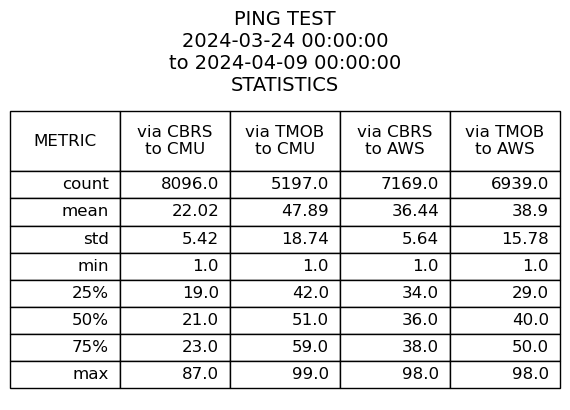

200 1.0 99.0
PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
LINE
PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
LINE
PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
LINE
PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
LINE


C:\Users\jimbl\AppData\Local\Temp\ipykernel_14656\2987344596.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[colname] = fdf1['TIME'].rolling(WINDOW).mean()
C:\Users\jimbl\AppData\Local\Temp\ipykernel_14656\2987344596.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fdf1[colname] = fdf1['TIME'].rolling(WINDOW).mean()
C:\Users\jimbl\AppData\Local\Temp\ipykernel_14656\2987344596.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
ROLLING LINE
PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
ROLLING LINE
PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
ROLLING LINE
PING TEST
2024-03-24 00:00:00
to 2024-04-09 00:00:00
ROLLING LINE


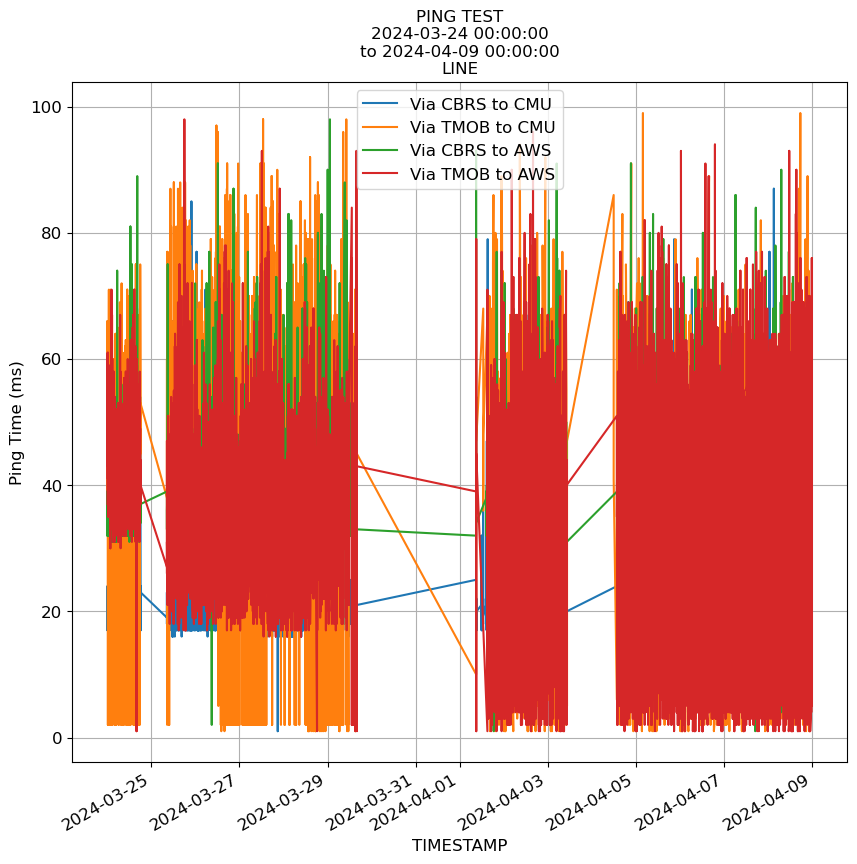

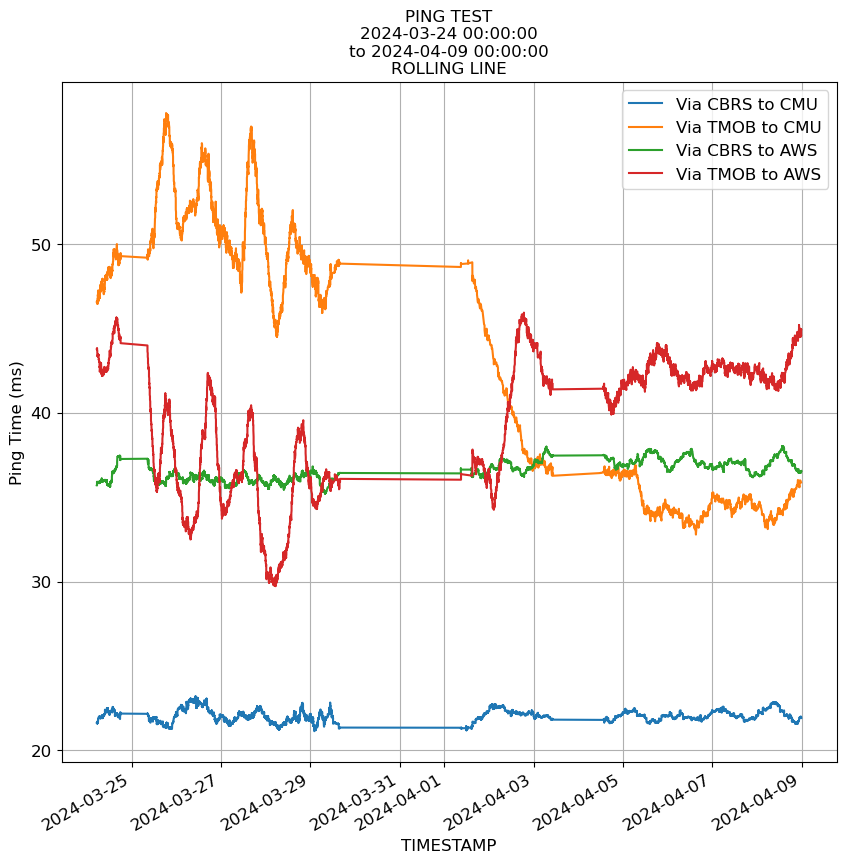

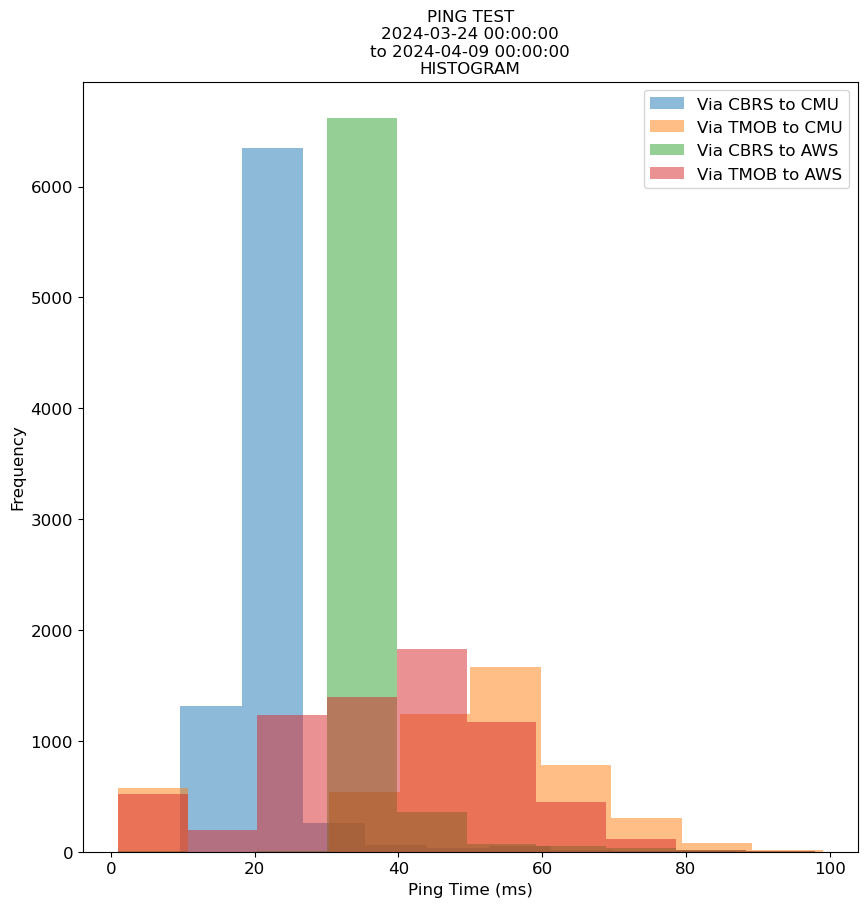

In [13]:
def makeTable(fdf,title="UNKNOWN",filename="tmp.png"):
    # print(filename)
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    describe = pd.DataFrame()
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            fser = np.round(fdf1.TIME.describe(),2)
            fser.name = f"via {SACCESS}\nto {SDEST}"
            # dumpdf(fser)
            describe = pd.concat([describe,fser],axis=1)
    describe = describe.reset_index(names=['METRIC'])
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=describe.values, colLabels=describe.columns, loc='center')
    cellDict = table.get_celld() # Set header size
    for ii in range(0,5):
        cellDict[(0,ii)].set_height(.1)
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(title,fontsize=14)
    fig.tight_layout()
    plt.show()
    savePlot(ax,filename)
title = f"PING TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
tdfz = tdfy.copy()[['TIME','TIMESTAMP','SDEST','SACCESS']]
makeTable(tdfz,title=title + "\nSTATISTICS",filename="PING TEST STATS.png")

colname='ROLLINGTIME'
# WINDOW=int(np.round(60/7*4,0))
WINDOW=200
print(WINDOW,tdfy.TIME.min(),tdfy.TIME.max())
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            if col == 'ROLLINGTIME':
                fdf1[colname] = fdf1['TIME'].rolling(WINDOW).mean()
            ax = ts_lineplot(fdf1,[col], ax=ax, title=title,legend=True)
            legendlabellst.append(f"Via {SACCESS} to {SDEST}")
    ax.legend(labels=legendlabellst)
    ax.set_title(title,fontsize=12)
    ax.set_ylabel("Ping Time (ms)")
    savePlot(ax,filename)
tdfz = tdfy.copy()
makeLine(tdfz,"TIME",filename="PING LINE TEST.png",title=title + "\nLINE")
makeLine(tdfz,"ROLLINGTIME",filename="ROLLING PING LINE TEST.png",title=title + "\nROLLING LINE")

def makeHist(fdf,col,title="UNKNOWN", filename="tmp.png",filterdest=None,filteraccess = None):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    # ax = None
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        if filterdest is not None and filterdest != SDEST: continue
        for SACCESS in sacclst:
            if filteraccess is not None and filteraccess != SACCESS: continue
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            ax = histplot(fdf1.TIME, ax=ax, title=title, tabon=False, legend=True)
            legendlabellst.append(f"Via {SACCESS} to {SDEST}")
    ax.legend(labels = legendlabellst,fontsize=12)
    ax.set_title(title,fontsize = 12)
    ax.set_xlabel("Ping Time (ms)")
    savePlot(ax,filename)
    
tdfz = tdfy.copy()
makeHist(tdfz,"TIME",filename="PING HIST TEST.png",title=title + "\nHISTOGRAM")
# makeHist(tdfz,"TIME",filename="PING HIST TEST.png",title=title + "\nHISTOGRAM",filterdest = "AWS",filteraccess="TMOB")

### Periodic Iperf

In [14]:
def readIPerfFile(fn):
    fdf = to_ts(readjoin("",fn),format = '%Y-%m-%d %H:%M:%S.%f')
    fdf['SDEST'] = fdf.DEST.map(lambda xx: cnf[xx])
    fdf['SACCESS'] = fdf.IFC.map(lambda xx: cnf[xx])
    # dumpdf(fdf)
    return fdf

# print(pingfiles)
tdfx = readIPerfFile(iperffiles[1])
dumpdf(tdfx)

(11, 8)
   THROUGHPUT                  TIMESTAMP                       HDATE   TEST  \
0        12.9 2024-03-29 13:06:51.601701  2024-03-29-13-06-51-601701  iperf   
1        16.0 2024-03-29 13:06:51.601701  2024-03-29-13-06-51-601701  iperf   
2        17.1 2024-03-29 13:06:51.601701  2024-03-29-13-06-51-601701  iperf   
3        18.1 2024-03-29 13:06:51.601701  2024-03-29-13-06-51-601701  iperf   
4        18.1 2024-03-29 13:06:51.601701  2024-03-29-13-06-51-601701  iperf   

           DEST              IFC SDEST SACCESS  
0  52.70.44.155  enx0016083656d3   AWS    CBRS  
1  52.70.44.155  enx0016083656d3   AWS    CBRS  
2  52.70.44.155  enx0016083656d3   AWS    CBRS  
3  52.70.44.155  enx0016083656d3   AWS    CBRS  
4  52.70.44.155  enx0016083656d3   AWS    CBRS  
THROUGHPUT           float64
TIMESTAMP     datetime64[ns]
HDATE                 object
TEST                  object
DEST                  object
IFC                   object
SDEST                 object
SACCESS             

In [15]:
tdfy = pd.DataFrame()
for fn in iperffiles:
    tdfx = readIPerfFile(fn)
    tdfy = pd.concat([tdfy,tdfx])

In [16]:
tdfy = tdfy[tdfy.TIMESTAMP > starttime].sort_values('TIMESTAMP')

title = f"IPERF TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"

In [26]:
dumpdf(tdfy[tdfy.DIRECTION.notna() & (tdfy.DIRECTION == "UP")])

(7415, 10)
    THROUGHPUT                  TIMESTAMP                       HDATE   TEST  \
11        13.0 2024-04-05 12:16:16.650854  2024-04-05-12-16-16-650854  iperf   
10        14.3 2024-04-05 12:16:16.650854  2024-04-05-12-16-16-650854  iperf   
9         13.8 2024-04-05 12:16:16.650854  2024-04-05-12-16-16-650854  iperf   
8         12.5 2024-04-05 12:16:16.650854  2024-04-05-12-16-16-650854  iperf   
7         16.7 2024-04-05 12:16:16.650854  2024-04-05-12-16-16-650854  iperf   

             DEST              IFC SDEST SACCESS DIRECTION  ROLLING THROUGHPUT  
11  128.2.208.222  enx0050b623c78d   CMU    TMOB        UP           85.811765  
10  128.2.208.222  enx0050b623c78d   CMU    TMOB        UP           79.379412  
9   128.2.208.222  enx0050b623c78d   CMU    TMOB        UP           74.050000  
8   128.2.208.222  enx0050b623c78d   CMU    TMOB        UP           67.976471  
7   128.2.208.222  enx0050b623c78d   CMU    TMOB        UP           61.908824  
THROUGHPUT            

100 1.02 451.0
IPERF TEST ROLLING THROUGHPUT UP 2024-04-05-12-16-16-650854
to 2024-04-09-07-57-50-759410 
LINE
IPERF TEST ROLLING THROUGHPUT UP 2024-04-05-12-16-16-650854
to 2024-04-09-07-57-50-759410 
LINE
IPERF TEST ROLLING THROUGHPUT UP 2024-04-05-12-16-16-650854
to 2024-04-09-07-57-50-759410 
LINE
IPERF TEST ROLLING THROUGHPUT UP 2024-04-05-12-16-16-650854
to 2024-04-09-07-57-50-759410 
LINE
IPERF UP TEST STATS.png
(8,)
count    1817.00
mean       15.22
std         3.35
min         2.79
25%        13.30
Name: CMU TMOB, dtype: float64
float64
(8,)
count    1916.00
mean       15.99
std         1.82
min        10.20
25%        15.10
Name: CMU CBRS, dtype: float64
float64
(8,)
count    1864.00
mean       15.24
std         3.58
min         5.18
25%        12.90
Name: AWS TMOB, dtype: float64
float64
(8,)
count    1818.00
mean       15.73
std         2.32
min         8.23
25%        14.20
Name: AWS CBRS, dtype: float64
float64


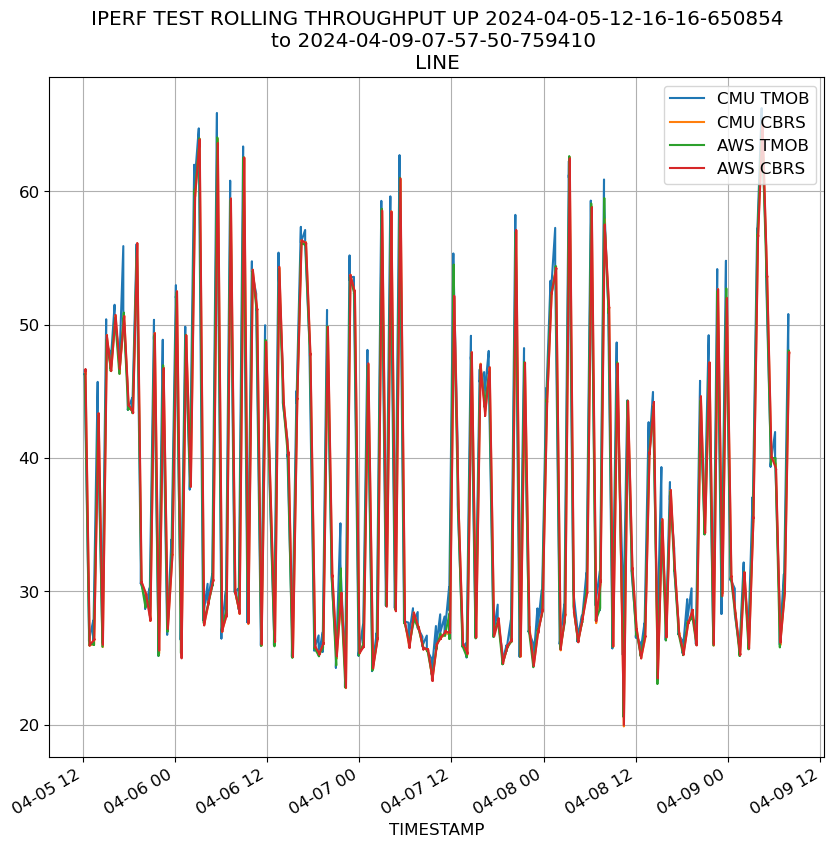

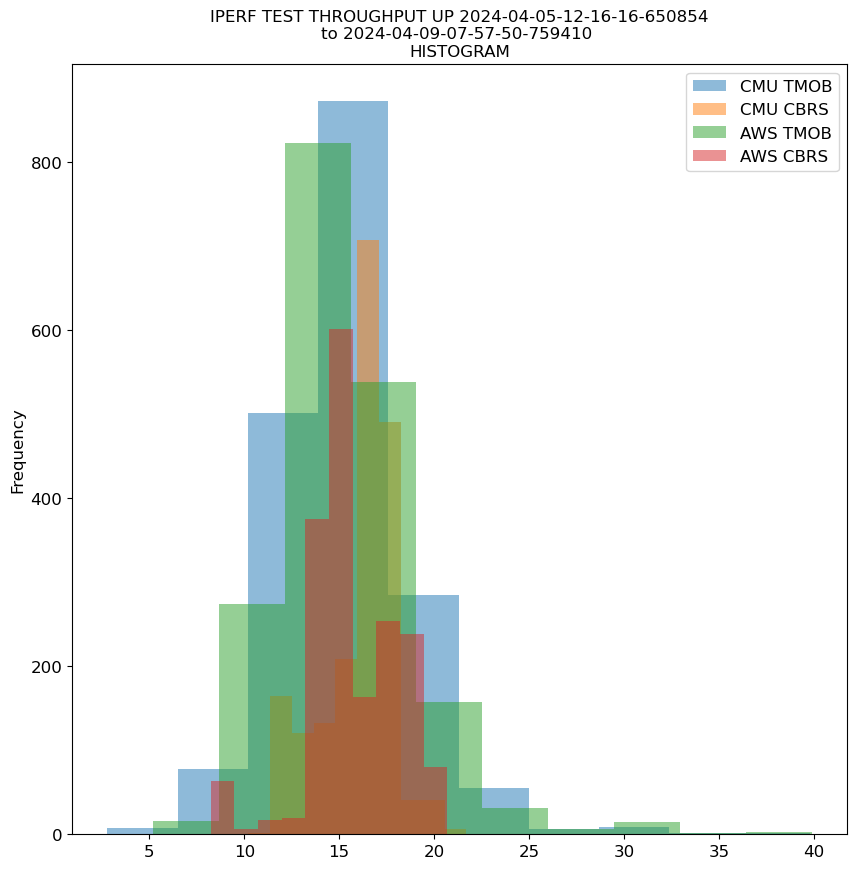

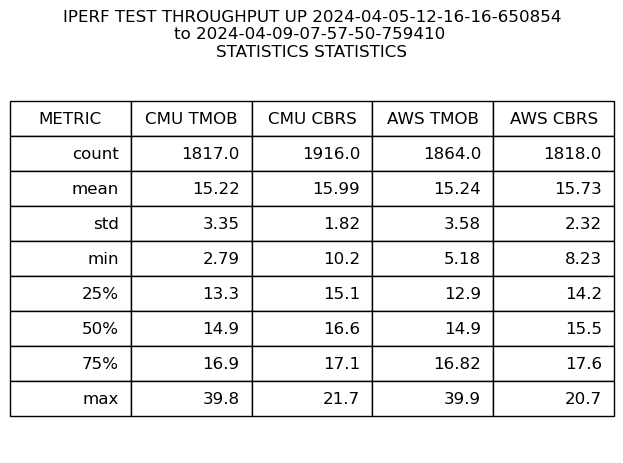

In [52]:
colname='ROLLING THROUGHPUT'
DIRECTION='UP'
# dumpdf(tdfy)
WINDOW=int(np.round(60/7*4,0))
WINDOW=100
print(WINDOW,tdfy.THROUGHPUT.min(),tdfy.THROUGHPUT.max())
tdfz = tdfy.copy()[['THROUGHPUT','TIMESTAMP','SDEST','SACCESS','DIRECTION','HDATE']]
if colname != "THROUGHPUT":
    tdfz[colname] = tdfz['THROUGHPUT'].rolling(WINDOW).mean()
tdfz['DIRECTION'] = tdfz.DIRECTION.map(lambda xx: "UP" if xx == np.nan else xx)
tdfz = tdfz[tdfz.DIRECTION == DIRECTION]

# dumpdf(tdfy)
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            ax = ts_lineplot(fdf1,[col], ax=ax, title=title,legend=True)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels=legendlabellst,fontsize=12)

    savePlot(ax,filename)
title = f"IPERF TEST {colname} {DIRECTION} {tdfz.HDATE.min()}\nto {tdfz.HDATE.max()} "
makeLine(tdfz,colname,filename=f"IPERF {DIRECTION} TEST LINE.png",title=title + "\nLINE")

def makeHist(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            ax = histplot(fdf1[col], ax=ax, title=title, tabon=False, legend=True)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels = legendlabellst,fontsize=12)
    ax.set_title(title,fontsize=12)
    savePlot(ax,filename)

title = f"IPERF TEST THROUGHPUT {DIRECTION} {tdfz.HDATE.min()}\nto {tdfz.HDATE.max()} "
makeHist(tdfz,"THROUGHPUT",filename=f"IPERF {DIRECTION} TEST HIST.png",title=title + "\nHISTOGRAM")

def makeTable(fdf,col,title="UNKNOWN",filename="tmp.png"):
    print(filename)
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    describe = pd.DataFrame()
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            fser = np.round(fdf1.THROUGHPUT.describe(),2)
            fser.name = f"{SDEST} {SACCESS}"
            dumpdf(fser)
            describe = pd.concat([describe,fser],axis=1)
    describe = describe.reset_index(names=['METRIC'])
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=describe.values, colLabels=describe.columns, loc='center')
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(title + " STATISTICS",fontsize=12)
    fig.tight_layout()
    plt.show()
    savePlot(ax,filename)
    
title = f"IPERF TEST THROUGHPUT {DIRECTION} {tdfz.HDATE.min()}\nto {tdfz.HDATE.max()} "
makeTable(tdfz,"THROUGHPUT",title=title + "\nSTATISTICS" ,filename=f"IPERF {DIRECTION} TEST STATS.png")

### Periodic Traceroute

In [53]:
def readTraceRouteFile(fn):
    fdf = to_ts(readjoin("",fn),format = '%Y-%m-%d %H:%M:%S.%f')
    fdf['FULLCOUNT'] = fdf.shape[0]
    # dumpdf(fdf)
    return fdf

tdfx = readTraceRouteFile(trrtfiles[0])

In [54]:
tdfy = pd.DataFrame()
for fn in trrtfiles:
    tdfx = readTraceRouteFile(fn)
    tdfy = pd.concat([tdfy,tdfx])
tdfy['SDEST'] = tdfy.DEST.map(lambda xx: cnf[xx])
tdfy['SACCESS'] = tdfy.IFC.map(lambda xx: cnf[xx])
tdfy['NIP'] = tdfy.IP.map(ipadd2ipno)
dumpdf(tdfy)


(71557, 10)
              IP                  TIMESTAMP                       HDATE  \
0  128.2.208.222 2024-03-22 12:54:36.317797  2024-03-22-12-54-36-317797   
1  192.168.128.1 2024-03-22 12:54:36.317797  2024-03-22-12-54-36-317797   
2  192.168.122.1 2024-03-22 12:54:36.317797  2024-03-22-12-54-36-317797   
3  128.2.208.222 2024-03-22 12:54:36.317797  2024-03-22-12-54-36-317797   
0   52.70.44.155 2024-03-22 12:55:13.144612  2024-03-22-12-55-13-144612   

         TEST           DEST              IFC  FULLCOUNT SDEST SACCESS  \
0  traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
1  traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
2  traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
3  traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
0  traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   

          NIP  
0  2147668190  
1  3232268289  
2  3232266753  
3  2147668190  
0   87701417

In [55]:
tdfy = tdfy[tdfy.TIMESTAMP > starttime].sort_values('TIMESTAMP')
title = f"TRACEROUTE TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
print(title)
dumpdf(tdfy)


TRACEROUTE TEST
2024-03-24 00:00:00
to 2024-04-09 09:00:00
(59996, 10)
               IP                  TIMESTAMP                       HDATE  \
0   128.2.208.222 2024-03-24 00:04:17.801835  2024-03-24-00-04-17-801835   
1   192.168.128.1 2024-03-24 00:04:17.801835  2024-03-24-00-04-17-801835   
2   192.168.122.1 2024-03-24 00:04:17.801835  2024-03-24-00-04-17-801835   
3   128.2.208.222 2024-03-24 00:04:17.801835  2024-03-24-00-04-17-801835   
10   99.82.179.32 2024-03-24 00:04:53.583073  2024-03-24-00-04-53-583073   

          TEST           DEST              IFC  FULLCOUNT SDEST SACCESS  \
0   traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
1   traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
2   traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
3   traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
10  traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   

           NIP  
0   

In [56]:
retcols = ['country_code','region_name','city_name','latitude','longitude']
nullser =  pd.Series([None for col in retcols],index=retcols)
nulllst = nullser.to_list()
# print(nullser)
def fetchIPdata(nip):
    tdf = idf[(idf.ip_from <= nip ) & (idf.ip_to >= nip)  & (idf.latitude != 0 ) ]
    if tdf.shape[0] == 0: return nulllst
    retlst = tdf[retcols].iloc[0].to_list()
    return retlst

tdfx = tdfy.copy()[:]
tdfx[retcols] = pd.DataFrame(tdfx.NIP.map(fetchIPdata).tolist(), index= tdfx.index)
tdfx = tdfx.dropna()
''' Mark each row with the number of GEO IP addresses in that traceroute '''
tdfx['GEOCOUNT'] = tdfx.groupby('HDATE')['HDATE'].transform('count')
dumpdf(tdfx)

(30994, 16)
               IP                  TIMESTAMP                       HDATE  \
0   128.2.208.222 2024-03-24 00:04:17.801835  2024-03-24-00-04-17-801835   
3   128.2.208.222 2024-03-24 00:04:17.801835  2024-03-24-00-04-17-801835   
10   99.82.179.32 2024-03-24 00:04:53.583073  2024-03-24-00-04-53-583073   
9   163.253.1.147 2024-03-24 00:04:53.583073  2024-03-24-00-04-53-583073   
8   163.253.1.136 2024-03-24 00:04:53.583073  2024-03-24-00-04-53-583073   

          TEST           DEST              IFC  FULLCOUNT SDEST SACCESS  \
0   traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
3   traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
10  traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   
9   traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   
8   traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   

           NIP country_code   region_name      city_name   latitude  \
0   21476

In [57]:
writejoin(tdfx.set_index('TIMESTAMP'),DATADIR2,"TRACEROUTE_SAVE.csv")

In [58]:
tdfx = to_ts(readjoin(DATADIR2,"TRACEROUTE_SAVE.csv"))
dumpdf(tdfx)

(30994, 16)
                   TIMESTAMP             IP                       HDATE  \
0 2024-03-24 00:04:17.801835  128.2.208.222  2024-03-24-00-04-17-801835   
1 2024-03-24 00:04:17.801835  128.2.208.222  2024-03-24-00-04-17-801835   
2 2024-03-24 00:04:53.583073   99.82.179.32  2024-03-24-00-04-53-583073   
3 2024-03-24 00:04:53.583073  163.253.1.147  2024-03-24-00-04-53-583073   
4 2024-03-24 00:04:53.583073  163.253.1.136  2024-03-24-00-04-53-583073   

         TEST           DEST              IFC  FULLCOUNT SDEST SACCESS  \
0  traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
1  traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
2  traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   
3  traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   
4  traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   

          NIP country_code   region_name      city_name   latitude  \
0  2147668190         

In [59]:
def runIPdf(fdf):
    fdf['geometry'] = pt2geom(fdf,latcol='latitude',lngcol='longitude')
    fdf['geometrynext'] = fdf['geometry'].shift(-1)
    fdf['region_name_next'] = fdf['region_name'].shift(-1)
    fdf['city_name_next'] = fdf['city_name'].shift(-1)
    fdf = fdf.dropna()
    # print(fdf.shape[0],fdf)
    tgp = df2gp(fdf.copy())
    tgp['LINEGEO'] = tgp.apply(lambda row: LineString([row['geometry'],row['geometrynext']]), axis = 1)
    # print(type(tgp))
    return tgp
tgpa = runIPdf(tdfx).reset_index(drop=True)

C:\Users\jimbl\.conda\envs\py38\lib\site-packages\pandas\core\dtypes\cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\jimbl\.conda\envs\py38\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
C:\Users\jimbl\.conda\envs\py38\lib\site-packages\pandas\core\dtypes\cast.py:130: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


NUMBER OF TRACEROUTES: 5707
750 2024-03-25-15-19-50-775352


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


751 2024-03-25-15-20-11-298250


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


752 2024-03-25-15-20-48-374473


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


753 2024-03-25-15-27-15-316171


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


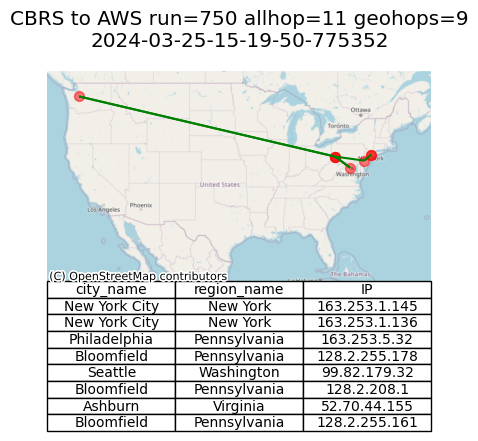

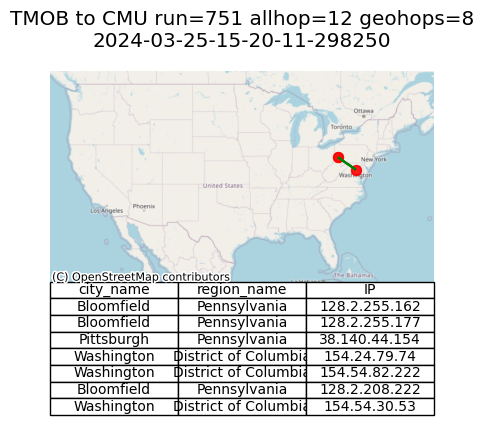

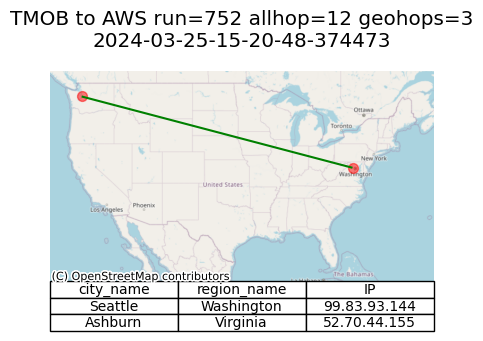

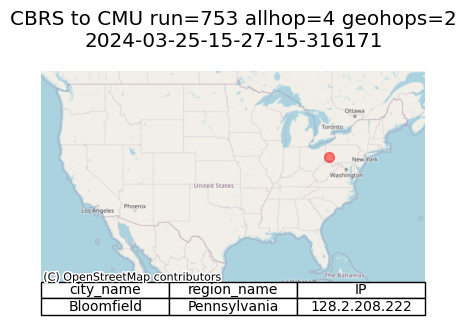

In [60]:
def plotMap(fgp,title="NONE",saveon=False,filename="tmp.png"):
    tablecolumns = ['city_name','region_name','IP']
    tabdf = fgp[tablecolumns]
    plt.rcParams.update({'font.size': 12})
    # plt.figure(figsize=(20,20))
    fig, ax = plt.subplots()
    plt.subplots_adjust(left=0.2, right=0.8, bottom=0.3, top=0.9)
    # fig.subplots_adjust(hspace=30.0)
    ax= gp_plotPoints(usagb,ax=ax, mapon=True, alpha=0)
    ax = gp_plotPoints(fgp,ax=ax, mapon=True,c='red',title=title)
    fgp = fgp[:-1] # Remove the last line -- belongs to next group
    ax = gp_plotLines(fgp,mapon=True,geocol='LINEGEO',ax=ax,color='green')
    table = ax.table(cellText=tabdf.values, colLabels=tabdf.columns,cellLoc='center', loc='bottom')
    table.scale(1,1)
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    if saveon:
        savePlot(ax,filename)

''' Slice Plot '''
tgpb = tgpa.copy()
tgroup = tgpb.groupby('HDATE')
print(f"NUMBER OF TRACEROUTES: {tgroup.ngroups}")
pltstart = 750
pltlimit = pltstart + 3
for ii, (name, group) in enumerate(tgroup):
    if ii >= pltstart:
        print(ii,name)
        # dumpdf(group,head=group.shape[0])
        title = f"{group.SACCESS.iloc[0]} to {group.SDEST.iloc[0]} run={ii} allhop={group.FULLCOUNT.iloc[0]} geohops={group.GEOCOUNT.iloc[0]}\n{group.HDATE.iloc[0]}"
        filename=f"TRACEROUTE_MAP_{group.SACCESS.iloc[0]}_{group.SDEST.iloc[0]}_RUN_{ii}_{group.HDATE.iloc[0]}.png"
        plotMap(group[1:],title=title,filename=filename,saveon=True)
    if ii >= pltlimit: break
# dumpdf(tgpb)

NUMBER OF TRACEROUTES: 1423
24 2024-03-24-03-16-52-736623


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


25 2024-03-24-03-24-52-663988


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


26 2024-03-24-03-32-52-584214


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


27 2024-03-24-03-40-52-178010


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


28 2024-03-24-03-48-53-419977


C:\Users\jimbl\.conda\envs\py38\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


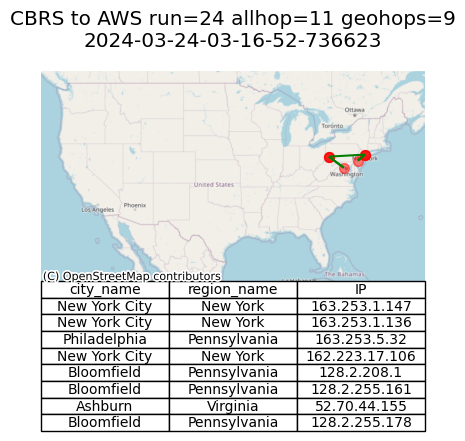

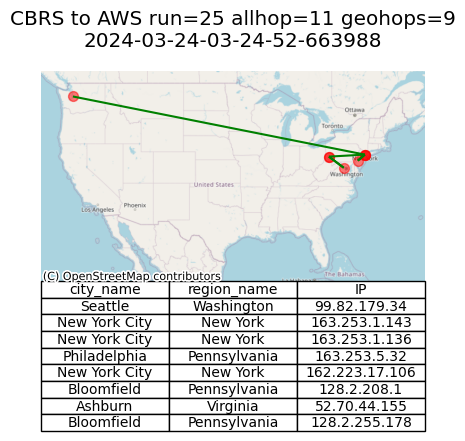

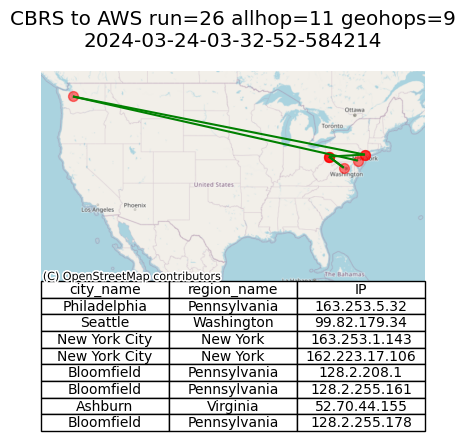

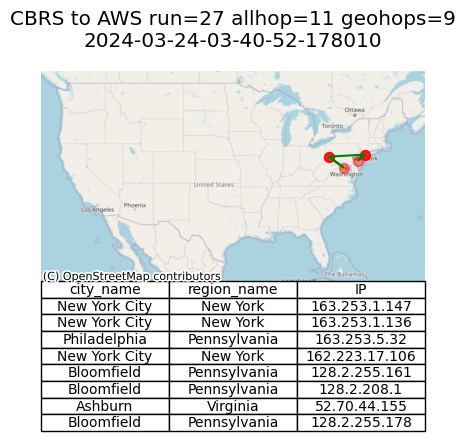

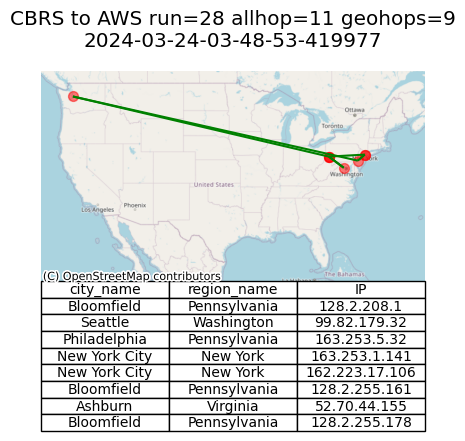

In [61]:
''' Filter Plot '''
saccess = "CBRS"
sdest = "AWS"
tgpb = tgpa.copy()[(tgpa.SACCESS == saccess) & (tgpa.SDEST == sdest)]
tgroup = tgpb.groupby('HDATE')
print(f"NUMBER OF TRACEROUTES: {tgroup.ngroups}")
pltstart = 24
pltlimit = pltstart + 4
for ii, (name, group) in enumerate(tgroup):
    if ii >= pltstart:
        print(ii,name)
        title = f"{group.SACCESS.iloc[0]} to {group.SDEST.iloc[0]} run={ii} allhop={group.FULLCOUNT.iloc[0]} geohops={group.GEOCOUNT.iloc[0]}\n{group.HDATE.iloc[0]}"
        filename=f"TRACEROUTE_MAP_{group.SACCESS.iloc[0]}_{group.SDEST.iloc[0]}_RUN_{ii}_{group.HDATE.iloc[0]}.png"
        plotMap(group[1:],title=title,filename=filename,saveon=True)
    if ii >= pltlimit: break
# dumpdf(tgpb)

(30994, 4)
  SDEST SACCESS  FULLCOUNT                       HDATE
0   CMU    CBRS          4  2024-03-24-00-04-17-801835
1   CMU    CBRS          4  2024-03-24-00-04-17-801835
2   AWS    CBRS         11  2024-03-24-00-04-53-583073
3   AWS    CBRS         11  2024-03-24-00-04-53-583073
4   AWS    CBRS         11  2024-03-24-00-04-53-583073
SDEST        object
SACCESS      object
FULLCOUNT     int64
HDATE        object
dtype: object
CMU CBRS
CMU TMOB
AWS CBRS
AWS TMOB


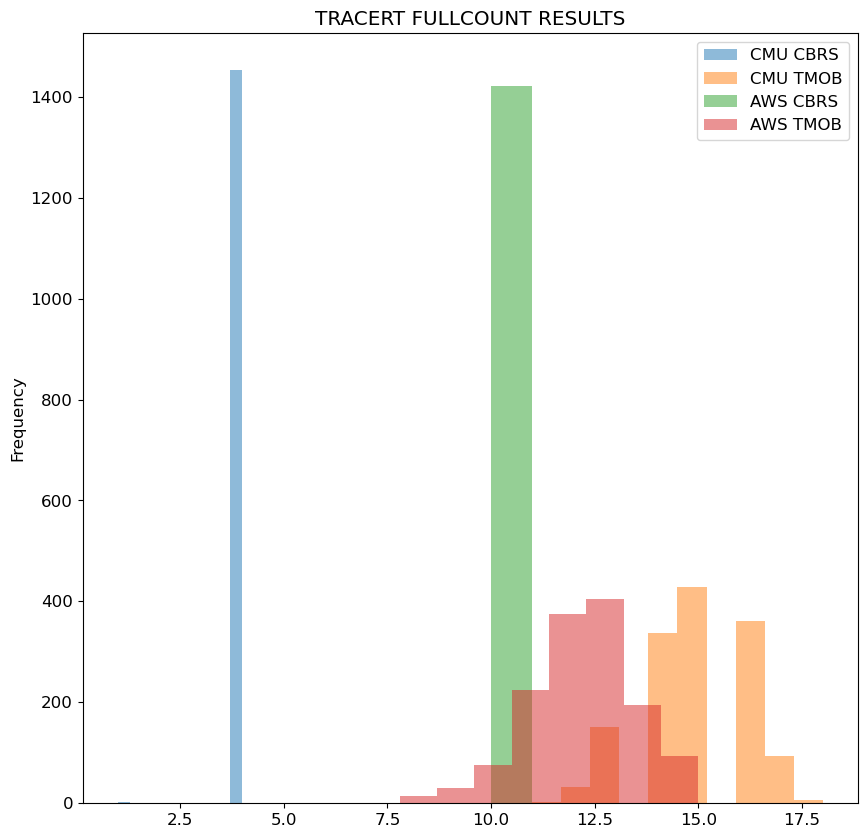

In [62]:
def makeHist(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            print(f"{SDEST} {SACCESS}")
            fdf1 = fdf[(fdf.SDEST == SDEST) & (fdf.SACCESS == SACCESS)]
            ax = histplot(fdf1[col], ax=ax, title=title, tabon=False, legend=True,fontsize=12)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels = legendlabellst,fontsize=12)
    savePlot(ax,filename)
filename=f"TRACEROUTE_HISTOGRAM_{tdfx.HDATE.iloc[0]}_{tdfx.HDATE.iloc[-1]}.png"
dumpdf(tdfx[['SDEST','SACCESS','FULLCOUNT','HDATE']])
ax = makeHist(tdfx[['SDEST','SACCESS','FULLCOUNT','HDATE']].drop_duplicates('HDATE'),'FULLCOUNT', title=f"TRACERT FULLCOUNT RESULTS", filename="FULLCOUNT_"+filename)
# ax = makeHist(tdfx[['SDEST','SACCESS','GEOCOUNT']],'GEOCOUNT', title=f"TRACERT GEOCOUNT RESULTS",filename="GEOCOUNT_"+filename)

60 1 18
TRACEROUTE RESULTS FULLCOUNT
TRACEROUTE RESULTS FULLCOUNT
TRACEROUTE RESULTS FULLCOUNT
TRACEROUTE RESULTS FULLCOUNT


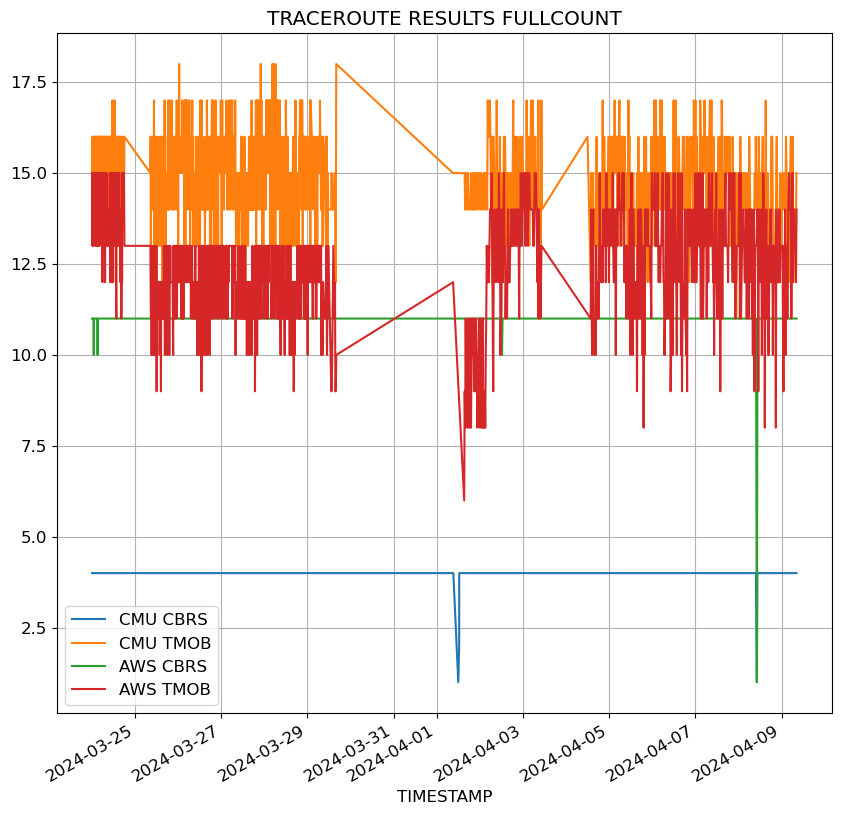

In [63]:
colname = 'FULLCOUNT'
tdfy = tdfx.copy()
tdfy['PRIVATECOUNT'] = tdfy.FULLCOUNT - tdfy.GEOCOUNT
tdfy = tdfy.drop_duplicates(['HDATE',colname])

WINDOW=60
print(WINDOW,tdfy[colname].min(),tdfy[colname].max())
# dumpdf(tdfy)
def makeLine(fdf,col,title="UNKNOWN", filename="tmp.png"):
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    legendlabellst = []
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            ax = ts_lineplot(fdf1,[col], ax=ax, title=f"TRACEROUTE RESULTS {col}",legend=True)
            legendlabellst.append(f"{SDEST} {SACCESS}")
    ax.legend(labels=legendlabellst,fontsize=12)

    # savePlot(ax,filename)

makeLine(tdfy,colname)

TRACEROUTE TEST STATS.png
(8,)
count    1456.00
mean        3.99
std         0.12
min         1.00
25%         4.00
Name: CMU CBRS, dtype: float64
float64
(8,)
count    1416.00
mean       14.87
std         1.21
min        11.00
25%        14.00
Name: CMU TMOB, dtype: float64
float64
(8,)
count    1423.00
mean       10.99
std         0.27
min         1.00
25%        11.00
Name: AWS CBRS, dtype: float64
float64
(8,)
count    1412.00
mean       12.38
std         1.43
min         6.00
25%        12.00
Name: AWS TMOB, dtype: float64
float64


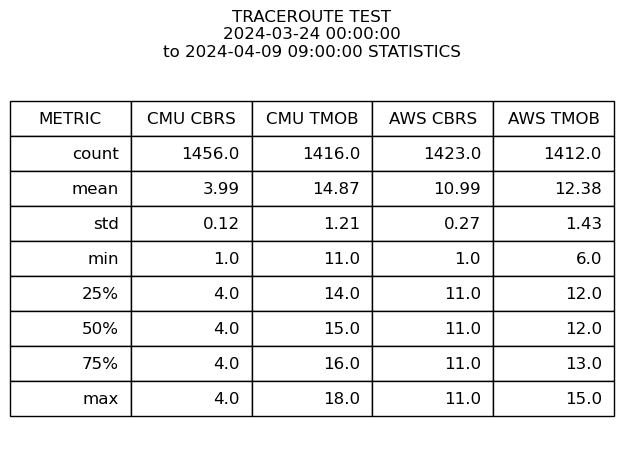

In [64]:
def makeTable(fdf,title="UNKNOWN",filename="tmp.png"):
    print(filename)
    sdestlst = list(fdf.SDEST.drop_duplicates())
    sacclst = list(fdf.SACCESS.drop_duplicates())
    describe = pd.DataFrame()
    for SDEST in sdestlst:
        for SACCESS in sacclst:
            fdf1 = fdf[(tdfy.SDEST == SDEST) & (tdfy.SACCESS == SACCESS)]
            fser = np.round(fdf1.FULLCOUNT.describe(),2)
            fser.name = f"{SDEST} {SACCESS}"
            dumpdf(fser)
            describe = pd.concat([describe,fser],axis=1)
    describe = describe.reset_index(names=['METRIC'])
    plt.rcParams.update({'font.size': 12})
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    table = ax.table(cellText=describe.values, colLabels=describe.columns, loc='center')
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    ax.set_title(title,fontsize=12)
    fig.tight_layout()
    plt.show()
    savePlot(ax,filename)
title = f"TRACEROUTE TEST\n{tdfy.TIMESTAMP.iloc[0].floor('1H')}\nto {tdfy.TIMESTAMP.iloc[-1].ceil('1H')}"
makeTable(tdfy,title=title + " STATISTICS" ,filename="TRACEROUTE TEST STATS.png")

In [65]:
dumpdf(tdfy)

(5707, 21)
                    TIMESTAMP             IP                       HDATE  \
0  2024-03-24 00:04:17.801835  128.2.208.222  2024-03-24-00-04-17-801835   
2  2024-03-24 00:04:53.583073   99.82.179.32  2024-03-24-00-04-53-583073   
11 2024-03-24 00:05:10.831923  128.2.208.222  2024-03-24-00-05-10-831923   
18 2024-03-24 00:05:43.088123     52.93.4.46  2024-03-24-00-05-43-088123   
22 2024-03-24 00:12:16.873198  128.2.208.222  2024-03-24-00-12-16-873198   

          TEST           DEST              IFC  FULLCOUNT SDEST SACCESS  \
0   traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   
2   traceroute   52.70.44.155  enx0016083656d3         11   AWS    CBRS   
11  traceroute  128.2.208.222             eth1         15   CMU    TMOB   
18  traceroute   52.70.44.155             eth1         15   AWS    TMOB   
22  traceroute  128.2.208.222  enx0016083656d3          4   CMU    CBRS   

           NIP  ...   region_name   city_name   latitude   longitude  \
0   21476